John Kenney - jfk150030
Matt Brown  - meb180001

<b>Assignment 3 Sentiment Prediction w/ LSTM</b>

In [1]:
#pip install -q -U tensorflow-text


In [2]:
#pip install -q tf-models-official

In [3]:
import os
import shutil
import pandas as pd
import seaborn as sns
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer
import numpy as np



import matplotlib.pyplot as plt

<b>Assignment 3 Sentiment Prediction w/ Naive Bayes</b>

Read in the dataset into a pandas dataframe. 
Using sklearn environment, perform the train test split. View first and last 5 rows of the data.


In [4]:
url = 'https://raw.githubusercontent.com/jkenney1123/CS4372_Assignment3/main/imdb_labelled.txt'
dataset = pd.read_csv(url,sep='\t',names = ["text","label"])
dataset

,text,label
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing.",0
746,Exceptionally bad!,0


Visualize the datset. Look at # of positive and negative reviews.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


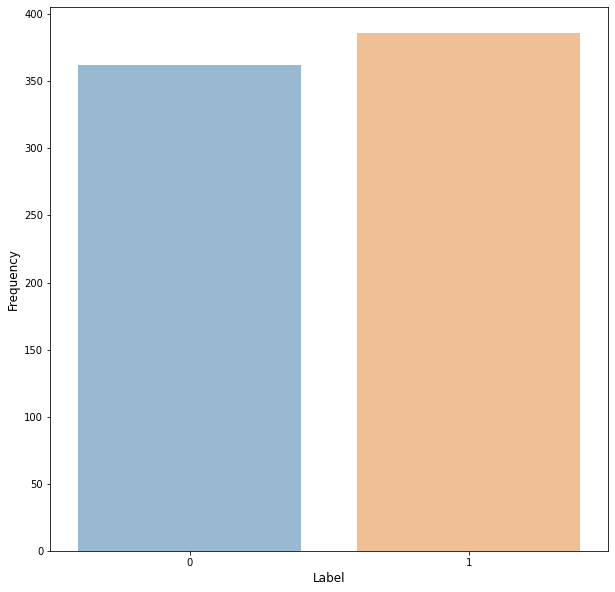

In [5]:
label_count = dataset["label"].value_counts()

plt.figure(figsize = (10, 10))
sns.barplot(label_count.index, label_count.values, alpha = 0.5)
plt.xlabel('Label', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)

plt.show()

In [6]:
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer

text = dataset["text"]
label = dataset["label"]

# convert words to a vector (similar to Word2Vec)
vectorizer = CountVectorizer(stop_words = 'english')
features = vectorizer.fit_transform(text)
features.shape

(748, 2811)

features is a sparse matrix

In [7]:
type(features)

scipy.sparse.csr.csr_matrix

In [8]:
from sklearn.model_selection import train_test_split

# split the data into train and test portions, stratify keeps the label proportions consistent
train_X, test_X, train_y, test_y = train_test_split(features, label, stratify = label, test_size = 0.2, random_state = 42)


from sklearn.naive_bayes import MultinomialNB

# create a Multinomial NB classifier, default hyperparameters used
nb_classifier = MultinomialNB()

# train the model 
nb_classifier.fit(train_X, train_y)

# evaluate the model, look at accuracy
accuracy = nb_classifier.score(test_X, test_y)
print("The model correctly classifies ", round(accuracy*100, 2), "% of the reviews")

The model correctly classifies  70.67 % of the reviews


In [9]:
# adjust hyperparameter fit_prior for a Multinomial NB classifier
nb_classifier2 = MultinomialNB(fit_prior = False)

# train the model 
nb_classifier2.fit(train_X, train_y)

# evaluate the model, look at accuracy
accuracy = nb_classifier2.score(test_X, test_y)
print("The model correctly classifies ", round(accuracy*100, 2), "% of the reviews")

The model correctly classifies  69.33 % of the reviews


Interesting to note with fit_prior = False, only a negligible decrease in accuracy

In [10]:
from sklearn.naive_bayes import GaussianNB
# choose a Gaussian NB classifier
nb_classifier3 = GaussianNB()

# train the model, default value of var_smoothing = 1e-9
v_smooth = 1e-9
nb_classifier3.fit(train_X.toarray(), train_y)

# evaluate the model, look at accuracy
accuracy = nb_classifier3.score(test_X.toarray(), test_y)
print("The model correctly classifies ", round(accuracy*100, 2), "% of the reviews with var_smoothing = ", v_smooth)

# choose a Gaussian NB classifier, adjust var_smoothing hyperparameter
v_smooth = 1e-3
nb_classifier4 = GaussianNB(var_smoothing=v_smooth)

# train the model 
nb_classifier4.fit(train_X.toarray(), train_y)

# evaluate the model, look at accuracy
accuracy = nb_classifier4.score(test_X.toarray(), test_y)
print("The model correctly classifies ", round(accuracy*100, 2), "% of the reviews with var_smoothing = ", v_smooth)

# choose a Gaussian NB classifier, adjust var_smoothing hyperparameter to 0.01
v_smooth = 0.01
nb_classifier4 = GaussianNB(var_smoothing=v_smooth)

# train the model 
nb_classifier4.fit(train_X.toarray(), train_y)

# evaluate the model, look at accuracy
accuracy = nb_classifier4.score(test_X.toarray(), test_y)
print("The model correctly classifies ", round(accuracy*100, 2), "% of the reviews with var_smoothing = ", v_smooth)

# choose a Gaussian NB classifier, adjust var_smoothing hyperparameter to 0.1
v_smooth = 0.1
nb_classifier5 = GaussianNB(var_smoothing=v_smooth)

# train the model 
nb_classifier5.fit(train_X.toarray(), train_y)

# evaluate the model, look at accuracy
accuracy = nb_classifier5.score(test_X.toarray(), test_y)
print("The model correctly classifies ", round(accuracy*100, 2), "% of the reviews with var_smoothing = ", v_smooth)

# choose a Gaussian NB classifier, adjust var_smoothing hyperparameter to 0.1
v_smooth = 10.0
nb_classifier6 = GaussianNB(var_smoothing=v_smooth)

# train the model 
nb_classifier6.fit(train_X.toarray(), train_y)

# evaluate the model, look at accuracy
accuracy = nb_classifier6.score(test_X.toarray(), test_y)
print("The model correctly classifies ", round(accuracy*100, 2), "% of the reviews with var_smoothing = ", v_smooth)



The model correctly classifies  70.67 % of the reviews with var_smoothing =  1e-09
The model correctly classifies  70.67 % of the reviews with var_smoothing =  0.001
The model correctly classifies  56.67 % of the reviews with var_smoothing =  0.01
The model correctly classifies  50.0 % of the reviews with var_smoothing =  0.1
The model correctly classifies  50.0 % of the reviews with var_smoothing =  10.0


Both Multinomial and Gaussian classifiers return the same accuracy. As a function of increasing var_smoothing, model accuracy decreases, but not lower than 50%.

Provide at least 10 reviews that were misclassified using the above naive bayes approach. Here I use the original MultinomialNB model.

In [11]:
incorrect_reviews = []
reviews = text[1:100]
true_labels = label[1:100]
term_matrix = vectorizer.transform(reviews)
predictions = nb_classifier.predict(term_matrix)
predictions.shape
# determine where predictions do not equal true labels
for i in range(1,len(reviews)):
  true_label = true_labels[i]
  pred_label = predictions[i]
  # when the labels are different, add a review to incorrect reviews
  if (true_label != pred_label):
    incorrect_reviews.append(reviews[i])
  if (len(incorrect_reviews) > 11):
    break

for i in range(0,10):
  print(incorrect_reviews[i])


The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.  
Wasted two hours.  
Saw the movie today and thought it was a good effort, good messages for kids.  
A bit predictable.  
And those baby owls were adorable.  
This is a very "right on case" movie that delivers everything almost right in your face.  
It had some average acting from the main person, and it was a low budget as you clearly can see.  
It's practically perfect in all of them  a true masterpiece in a sea of faux "masterpieces.  
 The structure of this film is easily the most tightly constructed in the history of cinema.  	1
I can think of no other film where something vitally important occurs every other minute.  	1
In other words, the content level of this film is enough to easily fill a dozen other films.  	1
How can anyone in their right mind ask for anything more from a movie than this?  	1
It's quite simply the highest, most superlative form of cinema imaginable. 

<b>Assignment 3 Sentiment Prediction w/ Keras</b>


In [12]:
#adjust learning rate, number of epochs, and optimizer to tune the bert model
lr = .0001/10
epoch = 25
optimizers =  tf.keras.optimizers.Adamax(learning_rate=lr)
#optimizers =  tf.keras.optimizers.Adam(learning_rate=lr)

In [13]:
#split the data into train and test data using the same random state above
X_train, X_test, Y_train, Y_test = train_test_split(dataset['text'], dataset['label'], test_size=0.2, random_state=42,stratify=dataset['label'])
#X_train, X_val, Y_train, Y_val  = train_test_split(tempx, tempy, test_size=0.25, random_state=42,stratify = tempy)

In [14]:
print(sum(Y_test)/len(Y_test))
print(sum(Y_train)/len(Y_train))
#print(sum(Y_val)/len(Y_val))

0.5133333333333333
0.5167224080267558


In [15]:
dataset.head()

,text,label
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [16]:
AUTOTUNE = tf.data.AUTOTUNE


Load pre-trained model (BERT, size 12) into keras.

In [17]:
bert_preprocessor_12 = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder_12 = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4",
                         trainable=True)

In [18]:
input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocess = bert_preprocessor_12(input)
embedded = bert_encoder_12(preprocess)
x = embedded['pooled_output']
dropl = tf.keras.layers.Dropout(0.2, name="dropout")(x)
output = tf.keras.layers.Dense(1, activation=None, name="classifier")(dropl)
model = tf.keras.Model(inputs=input, outputs = output)

In [19]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text (InputLayer)               [(None,)]            0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        {'input_type_ids': ( 0           text[0][0]                       
__________________________________________________________________________________________________
keras_layer_1 (KerasLayer)      {'default': (None, 7 109482241   keras_layer[0][0]                
                                                                 keras_layer[0][1]                
                                                                 keras_layer[0][2]                
______________________________________________________________________________________________

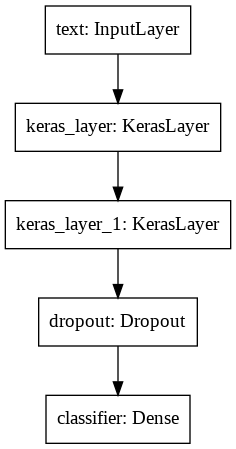

In [20]:
tf.keras.utils.plot_model(model)

In [21]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = optimizers,
              metrics=[tf.keras.metrics.BinaryAccuracy()])

In [22]:
history = model.fit(X_train,Y_train,
                    epochs=epoch)#,
                    #validation_data=(X_val, Y_val))

Epoch 1/25
19/19 [==============================] - 46s 2s/step - loss: 0.7276 - binary_accuracy: 0.5151
Epoch 2/25
19/19 [==============================] - 29s 2s/step - loss: 0.6287 - binary_accuracy: 0.6003
Epoch 3/25
19/19 [==============================] - 29s 2s/step - loss: 0.5354 - binary_accuracy: 0.6957
Epoch 4/25
19/19 [==============================] - 29s 2s/step - loss: 0.4327 - binary_accuracy: 0.7993
Epoch 5/25
19/19 [==============================] - 29s 2s/step - loss: 0.3294 - binary_accuracy: 0.8846
Epoch 6/25
19/19 [==============================] - 29s 2s/step - loss: 0.2419 - binary_accuracy: 0.9365
Epoch 7/25
19/19 [==============================] - 29s 2s/step - loss: 0.1875 - binary_accuracy: 0.9548
Epoch 8/25
19/19 [==============================] - 29s 2s/step - loss: 0.1465 - binary_accuracy: 0.9582
Epoch 9/25
19/19 [==============================] - 29s 2s/step - loss: 0.1172 - binary_accuracy: 0.9732
Epoch 10/25
19/19 [==============================] - 29

Plot training and test accuracy and loss, looking at first 10 epochs.

Review the loss and accuracy of the model, print the results.

In [23]:
loss, accuracy = model.evaluate(X_test,Y_test)
print("test")
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')
loss_t, accuracy_t = model.evaluate(X_train,Y_train)
print("train")
print(f'Loss: {loss_t}')
print(f'Accuracy: {accuracy_t}')

5/5 [==============================] - 4s 568ms/step - loss: 0.2562 - binary_accuracy: 0.9200
test
Loss: 0.2561758756637573
Accuracy: 0.9200000166893005
19/19 [==============================] - 11s 594ms/step - loss: 0.0059 - binary_accuracy: 1.0000
train
Loss: 0.005886889062821865
Accuracy: 1.0


In [24]:
y_pred = tf.sigmoid(model.predict(X_test))

In [25]:
y_pred = np.where(y_pred > 0.5, 1, 0)


In [26]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(Y_test, y_pred)
cm

array([[70,  3],
       [ 8, 69]])

Visualize a confusion matrix.

Text(33.0, 0.5, 'Truth')

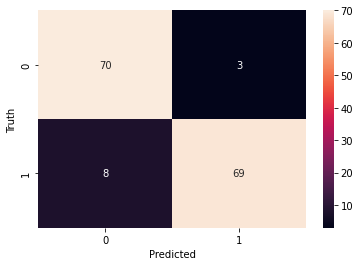

In [27]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [30]:
temp = X_test.reset_index(drop=True)
b = np.where(Y_test != y_pred[:,0])


print(temp[b[0]][0:11])


9      Jimmy Stewart is as ever a great hero for Hitc...
19     I struggle to find anything bad to say about i...
20     Director Neil LaBute uses brutal violence to s...
49      With great sound effects, and impressive spec...
70     You'll love it!  \t1\nThis movie is BAD.  \t0\...
77     If you do go see this movie, bring a pillow or...
80     And, FINALLY, after all that, we get to an end...
86     I would have casted her in that role after rea...
89             The soundtrack wasn't terrible, either.  
110    If you see it, you should probably just leave ...
148    Easily, none other cartoon made me laugh in a ...
Name: text, dtype: object
